<a href="https://colab.research.google.com/github/Nimshavs/Deep_Learning/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from itertools import product

In [ ]:
plt.rc('figure',autolayout=True)
plt.rc('image',cmap='magma')

In [ ]:
kernel = tf.constant([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])

In [9]:
image = tf.io.read_file('images.jpeg')
image = tf.io.decode_jpeg(image,channels=1)
image = tf.image.resize(image,size=[300,300])

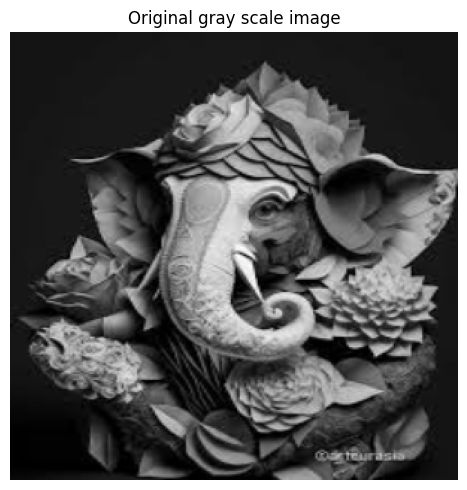

In [10]:
img = tf.squeeze(image).numpy()
#  tf.squeeze function is used to remove dimensions of size 1 from the shape of a tensor.

plt.figure(figsize=(5,5))
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.title('Original gray scale image')
plt.show()

In [11]:
image = tf.image.convert_image_dtype(image,dtype=tf.float32)
# converting the data type, so during scalling the range is between [0,1]

image = tf.expand_dims(image,axis=0)
kernel = tf.reshape(kernel,[*kernel.shape,1,1])
kernel = tf.cast(kernel,dtype=tf.float32)

In [12]:
conv = tf.nn.conv2d
image_filter = conv(input=image,
                    filters=kernel,
                    strides=1,
                    padding='SAME')
plt.figure(figsize=(5,5))

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

Text(0.5, 1.0, 'convolution')

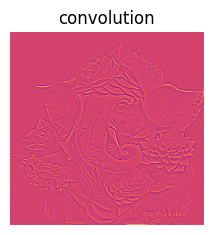

In [13]:
plt.subplot(1,3,1)
plt.imshow(tf.squeeze(image_filter))
plt.axis('off')
plt.title('convolution')

In [14]:
relu_fn=tf.nn.relu

Text(0.5, 1.0, 'Activation')

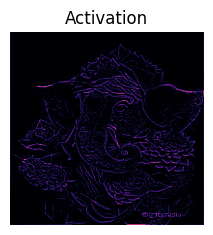

In [15]:
image_detect = relu_fn(image_filter)
plt.subplot(1,3,2)
plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.title('Activation')

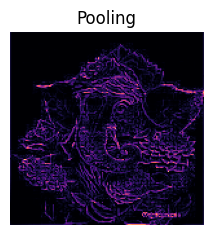

In [17]:
pool = tf.nn.pool
image_condence = pool(input=image_detect,
                      window_shape=(2,2),
                      pooling_type='MAX',
                      strides=(2,2),
                      padding='SAME')
plt.subplot(1,3,3)
plt.imshow(tf.squeeze(image_condence))
plt.axis('off')
plt.title('Pooling')
plt.show()